Analisis Prescriptivo de Rutas de Camiones en Santiago de Chile

📍 Comunas:
Santiago Centro (Centro logístico)

Providencia

Las Condes

Maipú

La Florida

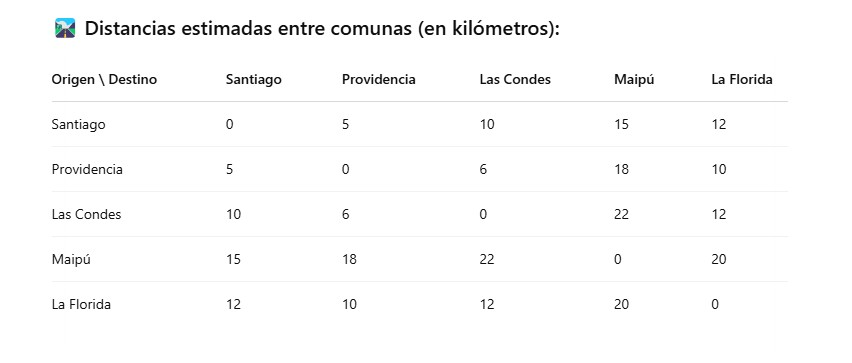

In [5]:
!pip install ortools



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [6]:
import numpy as np
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

In [7]:
# Comunas de Santiago, Chile
city_names = ["Santiago Centro", "Providencia", "Las Condes", "Maipú", "La Florida"]

# Distancia aproximada entre comunas (en kilómetros)
distance_matrix = [
    [0, 5, 10, 15, 12],       # Santiago Centro
    [5, 0, 6, 18, 10],        # Providencia
    [10, 6, 0, 22, 12],       # Las Condes
    [15, 18, 22, 0, 20],      # Maipú
    [12, 10, 12, 20, 0],      # La Florida
]



In [8]:
# Costo por km ( Modificar para ir probando )
cost_per_km = 1

In [9]:
def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 1
    data['depot'] = 0  # Santiago Centro como punto de inicio y fin
    return data

In [15]:
def print_solution(manager, routing, solution):
    print('Ruta óptima:')
    index = routing.Start(0)
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(city_names[manager.IndexToNode(index)])
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(city_names[manager.IndexToNode(index)])
    print(" -> ".join(route))
    print(f'Distancia total: {route_distance} km')
    print(f'Costo total estimado: ${route_distance * cost_per_km}')

In [16]:
def main():
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        print_solution(manager, routing, solution)
    else:
        print('No se encontró solución óptima.')

if __name__ == '__main__':
    main()


Ruta óptima:
Santiago Centro -> Providencia -> Las Condes -> La Florida -> Maipú -> Santiago Centro
Distancia total: 58 km
Costo total estimado: $58
